<a href="https://colab.research.google.com/github/Karishma-Kuria/CMPE-255-Gradient-Bost-Techniques/blob/main/gbm_classifier_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Various gbm classifier techniques**



In [180]:
# Importing relevant packages and data
from time import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

In [181]:
# Installing Catboost
!pip install catboost

In [303]:
from catboost import CatBoostClassifier
train_ds = pd.read_csv('https://github.com/Karishma-Kuria/CMPE-255-Gradient-Bost-Techniques/blob/main/train.csv?raw=true').sample(frac=1.0)
test_ds = pd.read_csv('https://github.com/Karishma-Kuria/CMPE-255-Gradient-Bost-Techniques/blob/main/test.csv?raw=true').sample(frac=1.0)

In [304]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S


## Preprocessing the data
1.   We are setting PassengerId as the index column.
2.   The label data y is the 'Survival' Column, will make its own dataframe and removing it from features set. 




In [305]:
y_train = train_ds["Survived"]
y_train.shape

(890,)

In [306]:
train_ds.drop(labels="Survived", axis=1, inplace=True)

# Concatenating the dataset
full_ds = train_ds.append(test_ds)
full_ds.shape

(1308, 11)

In [307]:
# Now Dropping all the features which are not required for training
drop_cols = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
full_ds.drop(labels=drop_cols, axis=1, inplace=True)

In [308]:
full_ds.shape

(1308, 4)

### Converting any categorial feature to numerical feature for the model.
### Filling empty cells with 0.

In [309]:
full_ds = pd.get_dummies(full_ds, columns=["Sex"])
full_ds.fillna(value=0.0, inplace=True)
full_ds.shape

(1308, 5)

## Splitting the complete dataset into testing and training data

In [310]:
X_train = full_ds.values[0:890]
x_test = full_ds.values[890:]

# Scalling data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(x_test)

# Splitting data into training and testing
state = 12  
test_size = 0.30
  
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size,random_state=state)

In [316]:
# Setting up results dataframe
results_df = pd.DataFrame(columns=['accuracy_score_training','accuracy_score_validation','run_time'])
results_df

,accuracy_score_training,accuracy_score_validation,run_time


Defining all the models along with relevent parameters.

In [317]:
# Decision tree with maximum depth = 12
decision_tree = DecisionTreeClassifier(max_depth=12, random_state=1234)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=500,
                            max_features=0.06,
                            n_jobs=6,
                            random_state=1234)
# Adaboost
base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06) 
ad_boost = AdaBoostClassifier(base_estimator=base_estim,
                        n_estimators=500,
                        learning_rate=0.5,
                        random_state=1234)
# XGBoost
xg_boost = XGBClassifier(n_estimators=2000,
                    tree_method='hist',
                    subsample=0.67,
                    colsample_level=0.06,
                    verbose=0,
                    n_jobs=6,
                    random_state=1234)
# LightGBM
light_gbm = LGBMClassifier(n_estimators=2000,
                      feature_fraction=0.06,
                      bagging_fraction=0.67,
                      bagging_freq=1,
                      verbose=0,
                      n_jobs=6,
                      random_state=1234)
# CatBoost
cat_boost = CatBoostClassifier(n_estimators=2000,
                        colsample_bylevel=0.06,
                        max_leaves=31,
                        subsample=0.67,
                        verbose=0,
                        thread_count=6,
                        random_state=1234)


In [349]:
# Putting models in list and extracting model names 
models = [decision_tree, random_forest, ad_boost, xg_boost, light_gbm, cat_boost]
# This is done to plot these models later
model_list = [i.__class__.__name__ for i in models]

## Training the models

In [350]:
for m, n in zip(models, model_list):
    start_time = time()
    if n in es_models:
        m.fit(x_train,
              y_train)
    else:
        m.fit(x_train, y_train)
    
    run_time = time() - start_time
    accuracy_score_training = m.score(x_train, y_train)
    accuracy_score_validation = m.score(x_val, y_val)
    results_df.loc[n] = [accuracy_score_training,accuracy_score_validation, run_time]
    
    del m


In [352]:
results_df.head(7)

,accuracy_score_training,accuracy_score_validation,run_time
DecisionTreeClassifier,0.956661,0.715356,0.006642
RandomForestClassifier,1.000000,0.749064,1.320574
AdaBoostClassifier,0.833066,0.782772,0.773215
XGBClassifier,0.998395,0.737828,3.648538
LGBMClassifier,0.934189,0.734082,4.225040
CatBoostClassifier,0.789727,0.779026,0.443321


## Visualizing the results

Plotting graph with accuracy_score_validation	 since we are more concerned with the validation accuracy.

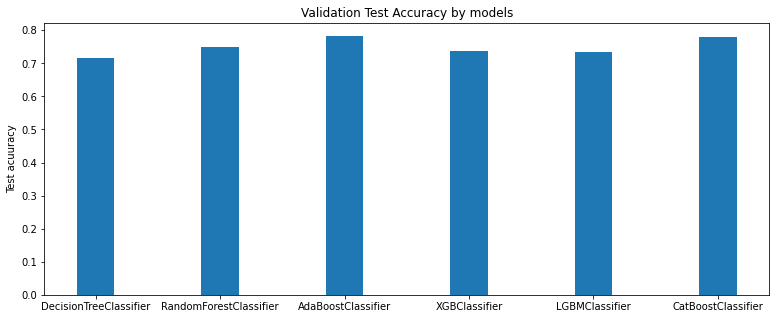

In [360]:
import seaborn as sns
from matplotlib import pyplot as plt
model_names = list(results_df.index)
val_accuracy = list(results_df['accuracy_score_validation'])
fig = plt.figure(figsize = (13, 5))
 
# creating the bar plot
plt.bar(model_names, val_accuracy,
        width = 0.3)
 
plt.ylabel("Test acuuracy")
plt.title("Validation Test Accuracy by models")

plt.show()

From the above graph its clear that, AdaBoost Classifier is the winner in terms of acuuracy, its very close Catboost. So catboost also performs good in this type of datasets with good run-time.

Plotting graph with run_time and Models names.

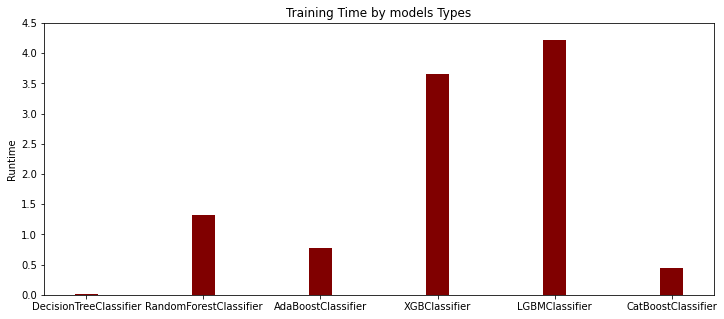

In [356]:
import seaborn as sns
from matplotlib import pyplot as plt
model_names = list(results_df.index)
val_accuracy = list(results_df['run_time'])
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(model_names, val_accuracy, color ='maroon',
        width = 0.2)
 
plt.ylabel("Runtime")
plt.title("Training Time by models Types")
plt.ylim(0, 4.5)
plt.show()

As per the above graph, its clear that Decision Tree is the clear winner in this case, since it uses the least run-time. Moreover CatBoost Also performed well in the speed test compared to other techniques.